In [1]:
import numpy as np                               #for creating ndarrays for fast and efficient computations

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
import matplotlib.gridspec as gridspec           #for making grids
from matplotlib.path import Path
import matplotlib.patches as patches
from __future__ import print_function

#for interactive notebooks
%matplotlib notebook


So, this is a pretty incomplete jupyter notebook. The purpose is to create create a class that plots a lorentian function. Super incomplete

When I am done this "package" I will do the same for the cavity class and maybe other functions

The purpose of these types of scripts is to make plotting various different distributions on a single figure simple. They will also provide as another mode of learning for playing around with parameters to help develop a feel for how certain equations and concepts work.

Here you will see how the lorentian distribution varies with its input parameters, the average and Gamma,

In [2]:
#define class with name lorentian 
class lorentian(object):
    #these are attributes of the class. They can be modified by using self.attribute = some-number
    #self is just the name of the instance belonging to this class
    #for example -----> a = lorentian('a') creates an instance label a that belongs to the class lorentian
    #you can look at cell just below to see how to create a class with this class type
    #below the initialization of the instances along with some ways to modify the attribute of the instances of our 
    #defined class type
    
    def __init__(self, name ='default', average = 0.0, gamma = 0.1, intensity = 1.0): 
        self.name = name
        self.average = average   #sets the average (the location of the lorentian distribution)
        self.gamma = gamma
        self.intensity = intensity
        self.x = np.linspace (average - 10,average + 10, 500) #creates the x axis array for plotting again
        self.f_dist = self.intensity * self.gamma/(np.pi * ((self.x - self.average)**2 + self.gamma**2))
        self.min_half = self.average - self.gamma
        self.max_half = self.average + self.gamma
        self.max_value = self.intensity * self.gamma / (np.pi * self.gamma**2)
        
#max_value = self.gamma/(np.pi*(self.gamma**2)) # need to remembre to turn this into a method to spit out the
#Full width half max and other useful parameters bassed on the attributes
    def f_lorentz(self):
        f_lorentz = self.intensity * self.gamma/(np.pi * ((self.x - self.average)**2 + self.gamma**2))
        return f_lorentz
    
#this method ( a function within a class) is suppose to plot the distrubution and automatically give fwhm etc
#its not working cause I need to derive the FWHM equation with the intensity/scalar parameter
#i have the normalized equation in place
    def plot(self): 
        plt.figure() # standard figure stuff, just to provide a feel for fullwidth half max
        plt.subplot() 
        plt.plot(self.x, self.f_dist, label = 'Lorentian Distribution')
        plt.axvline ( x = self.average - self.gamma , ymin = 0.40, ymax = 0.60, color = 'r' )
        plt.axvline ( x = self.average + self.gamma , ymin = 0.40, ymax = 0.60, color = 'r' )
        plt.axhline ( y = self.max_value/2, xmin = self.min_half, xmax = self.max_half, color = 'r' )
        plt.xlabel('Some Variable')
        plt.ylabel('Some Dependent Variable')
        plt.title('Lorentian Distribution')
        plt.show()

#this method ( a function within a class) plots the attributes
    def add_plot(self):
        f_dist = self.intensity*self.gamma/(np.pi*((self.x - self.average)**2 + self.gamma**2))
        self.line_lorent = ax_distribution.plot(self.x, f_dist, 
                                          label = self.name + ': $\Gamma$ = ' + str(self.gamma) + 
                                          ', $\mu$ = ' + str(self.average) +
                                          ', Intensity = ' + str(self.intensity))

Just hte various ways of initializing the 

In [3]:
a = lorentian('a', gamma = 1.0, intensity = 5.0, average = -5.0)

b = lorentian('b', gamma = 2.0, intensity=5.0)

c = lorentian('c', intensity = 0.5, gamma=0.2)

d = lorentian('d', average = 6.0, gamma = 0.5)

In [4]:
def f_convolution(dist_1, dist_2):
    dist_average = dist_1.average + dist_2.average
    f_convo_average = np.linspace( dist_average -5, dist_average + 5, 500)
    f_convo = np.convolve(dist_1.f_dist, dist_2.f_dist, mode ='same')  / sum(dist_1.f_dist)
    ax_distribution.plot(f_convo_average, f_convo, label = 'Convolution of '+ dist_1.name + ' and ' +dist_2.name)
    return f_convo

<IPython.core.display.Javascript object>


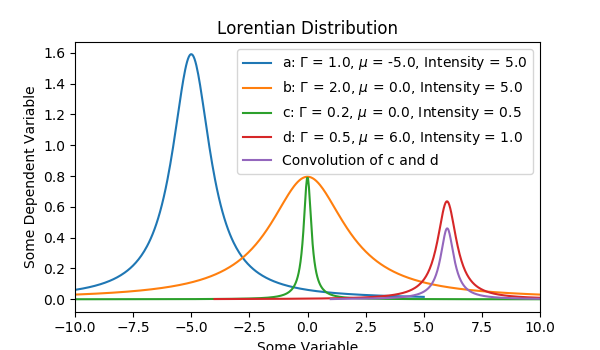

(-10, 10)

In [5]:
#goal is to figure out how to turn this cell into a function where gaussian.add_plot method can be added as 
#arguments want the amount to be abtrirary

plot_distribution_fig = plt.figure(figsize=(6,3.5))
ax_distribution = plot_distribution_fig.add_subplot(111)

a.add_plot()
b.add_plot()
c.add_plot()
d.add_plot()
f_convolution(c, d)

ax_distribution.legend()
ax_distribution.set_xlabel('Some Variable')
ax_distribution.set_ylabel('Some Dependent Variable')
ax_distribution.set_title('Lorentian Distribution')
ax_distribution.set_xlim(-10,10)

In [7]:
b.name

'b'